To access image data from Google image dataset we need to install OID toolkit

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

fatal: destination path 'OIDv4_ToolKit' already exists and is not an empty directory.


In [ ]:
!pip3 install -r /content/OIDv4_ToolKit/requirements.txt

Considering 10 category for multi class image classification 

In [ ]:
 =["Man", "Woman", "Dog","Cat","Banana","Car","Bicycle","Mango","Axe","Bee"]

In [ ]:
!python /content/OIDv4_ToolKit/main.py downloader --classes Man Woman Dog Cat Car Banana Mango Bicycle Axe Bee  --type_csv train --limit 80


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Man.

Man
    [INFO] | Downloading train images.
    [INFO] | [INFO] Found 378077 online images for train.
    [INFO] | Limiting to 80 images.
    [INFO] | Download of 80 images in train.
100% 80/

In [ ]:
!python /content/OIDv4_ToolKit/main.py downloader --classes Man Woman Dog Cat Car Banana Mango Bicycle Axe Bee --type_csv test --limit 50


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Man.
   [ERROR] | Missing the test-annotations-bbox.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...100%, 49 MB, 62138 KB/s, 0 seconds passed
[DOWNLOAD] | File test-ann

Import important libraries

In [9]:
import tensorflow as tf
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [10]:
base_dir = '/content/OID/Dataset'
train_dir = os.path.join(base_dir, 'train')  # image directory of train data
validation_dir = os.path.join(base_dir, 'test') #image directory of validation data

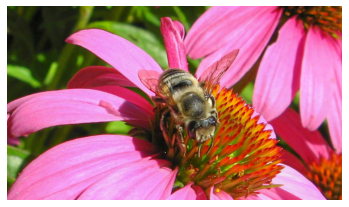

(592, 1024, 3)

In [33]:
img = mpimg.imread("/content/OID/Dataset/test/Bee/1554824fd4ebdc5f.jpg")   #access and show a image
plt.imshow(img)
plt.axis('Off')
plt.show()
img.shape

Add convolutional layers with input params like activation function, filter size and no of filters in single conv layer. 
Then use max pooling to reduce sample size and then flatten the final result to feed into the densely connected layers.


No trainable parameters in Maxpooling layers.

At last add the densely connected layers.

Our problem is multiclass label classifier so we will keep softmax activation function as activation for DNN layer.

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(500,500,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),   # before inserting it to DNN flatten output in sigle column matrix
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(1, activation='softmax')  # for multiclass output.
])


In [55]:
train_datagen = ImageDataGenerator(rescale=1./255)  #resizing of image before inserting it into Model
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,  # directory of training images
        target_size=(500, 500),  #conv network take images of same sizes so we"ll fix it as(500,500)
        batch_size=64,
      
        class_mode='categorical') #for multiclass category


validation_generator = test_datagen.flow_from_directory(
        validation_dir,     #dir of test set
        target_size=(500,500),
        batch_size=64,
        class_mode='categorical')


Found 880 images belonging to 10 classes.
Found 413 images belonging to 10 classes.


Since we are doing multiclass classification so loss function should be "categorical_crossentropy".
For checking the model prediction we use accuracy matrix to find out how many of our prediction were right.

In [56]:
model.summary()   

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_204 (Conv2D)          (None, 498, 498, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 247, 247, 64)      18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 123, 123, 64)      0         
_________________________________________________________________
conv2d_206 (Conv2D)          (None, 121, 121, 128)     73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 60, 60, 128)       0         
_________________________________________________________________
conv2d_207 (Conv2D)          (None, 58, 58, 128)      

In [58]:
history = model.fit(
      train_generator,
      steps_per_epoch=14,  #steps should be roughly = no_of_images/batch_size 
      epochs=10,
      validation_data=validation_generator,
      validation_steps=7   #steps should be roughly = no_of_images/batch_size
      )  


Epoch 1/10
14/14 [==============================] - 399s 29s/step - loss: 2.2825 - accuracy: 0.8991 - val_loss: 2.2722 - val_accuracy: 0.8971
Epoch 2/10
14/14 [==============================] - 394s 28s/step - loss: 2.3033 - accuracy: 0.8970 - val_loss: 2.1586 - val_accuracy: 0.8993
Epoch 3/10
14/14 [==============================] - 396s 29s/step - loss: 2.1306 - accuracy: 0.9008 - val_loss: 2.1845 - val_accuracy: 0.9002
Epoch 4/10
14/14 [==============================] - 395s 28s/step - loss: 2.1043 - accuracy: 0.9014 - val_loss: 2.0338 - val_accuracy: 0.8985
Epoch 5/10
14/14 [==============================] - 394s 28s/step - loss: 2.0895 - accuracy: 0.9014 - val_loss: 2.1018 - val_accuracy: 0.8937
Epoch 6/10
14/14 [==============================] - 395s 29s/step - loss: 1.9481 - accuracy: 0.9009 - val_loss: 2.0144 - val_accuracy: 0.8971
Epoch 7/10
14/14 [==============================] - 396s 28s/step - loss: 2.0497 - accuracy: 0.8998 - val_loss: 1.9901 - val_accuracy: 0.8971
Epoch 

Plot training and validation curve based on performence.

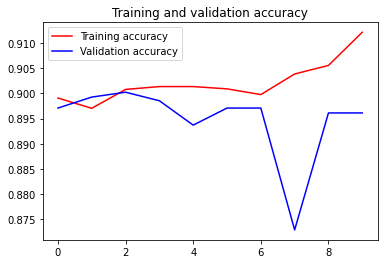

<Figure size 432x288 with 0 Axes>

In [59]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']  
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')        #plot training accuracy graph to visualize traning process
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')    #plot validation graph
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [60]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()  #import file from your desktop

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(500, 500))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])      #Stack arrays in sequence vertically (row wise)
  classes = model.predict(images, batch_size=10)   #if there are more then 1 images to predict
  print(fn)
  print(classes)

Saving WhatsApp Image 2021-02-22 at 3.20.53 PM.jpeg to WhatsApp Image 2021-02-22 at 3.20.53 PM.jpeg
WhatsApp Image 2021-02-22 at 3.20.53 PM.jpeg
[[0.0000000e+00 0.0000000e+00 1.9140895e-31 0.0000000e+00 0.0000000e+00
  1.0000000e+00 2.9619283e-26 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


Further approach for enhance model performence

1. Since we are dealing with multiclass classification more sophiscated CNN model like Inception Network and ResNets can be used.
2. By increasing training data
3. Dealing with class imbalence problem
4. Ensembling
5. Transfer learning 
6. Data Augmentation technique like random mirroring, shearing, rotation, random crop can be used to increase training data size and increase accuracy.